Logistic Regrassion

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [29]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Correlation Plot')

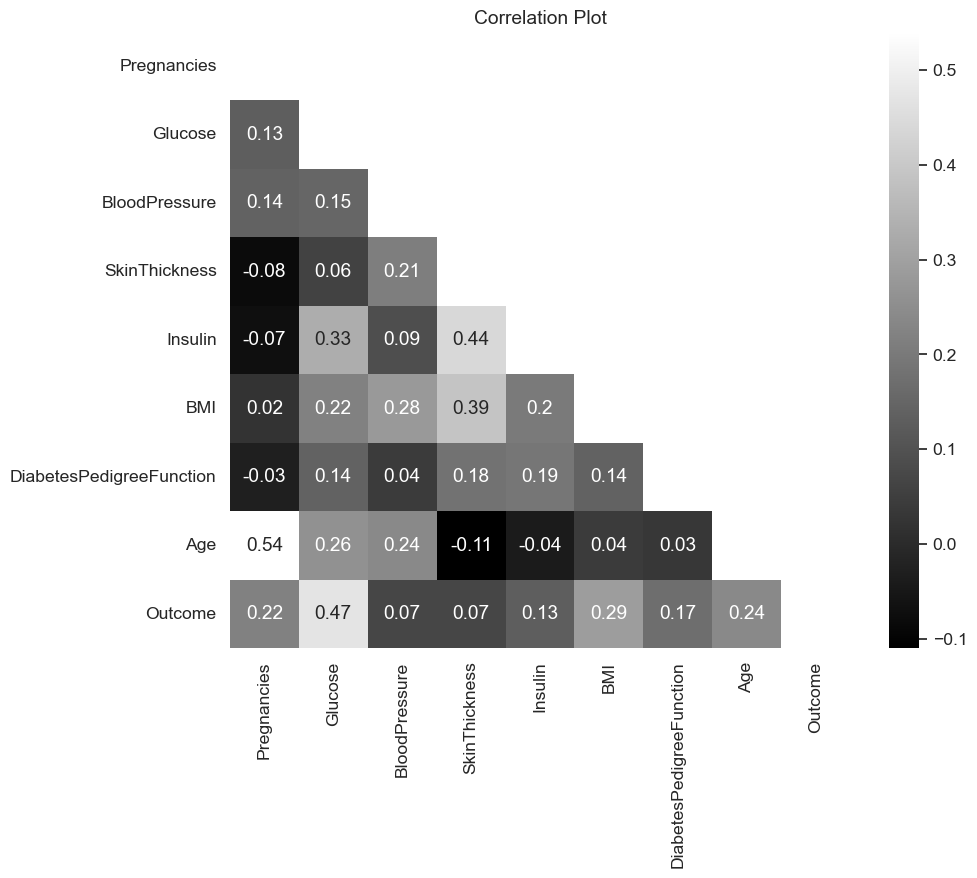

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(10, 8))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

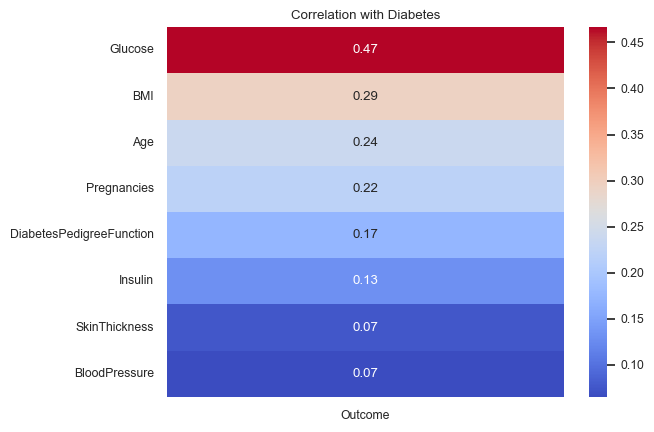

In [32]:
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [33]:
class_counts = df['Outcome'].value_counts()
print("Class Labels:")
print(class_counts)

Class Labels:
0    500
1    268
Name: Outcome, dtype: int64


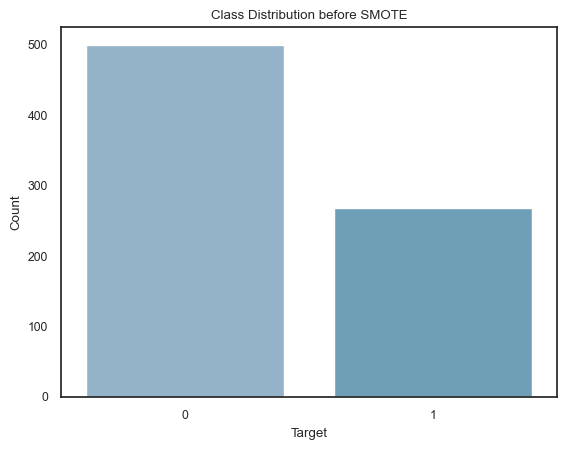

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x=df['Outcome'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution before SMOTE')

plt.show()

In [78]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [79]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Create a SMOTE instance
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_balanced, y_balanced = smote.fit_resample(X, y)

X=X_balanced
y=y_balanced
# Check the class distribution after applying SMOTE
class_distribution = pd.Series(y).value_counts()
print("Balanced Class Distribution after SMOTE:")
print(class_distribution)


Balanced Class Distribution after SMOTE:
1    500
0    500
Name: Outcome, dtype: int64


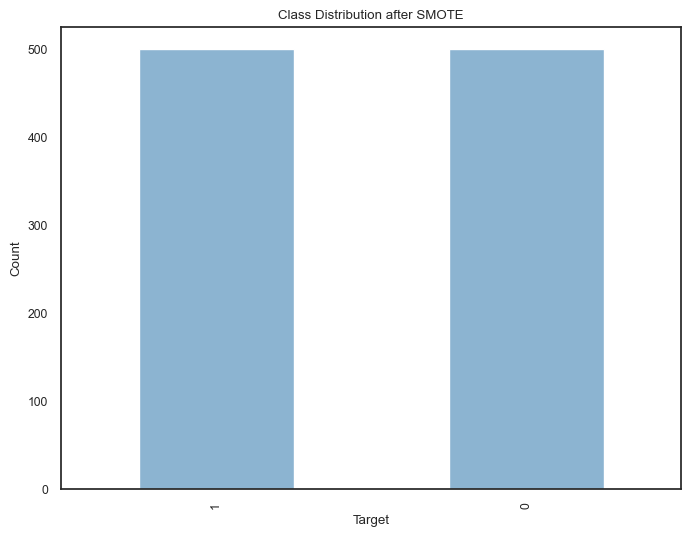

In [80]:
import matplotlib.pyplot as plt

# Create a bar plot of the balanced class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE')

plt.show()


In [81]:
import pandas as pd

df = pd.DataFrame(X_balanced, columns=X.columns)
df['target'] = y_balanced

print("Oversampled Dataset:")
df

Oversampled Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,2,167,56,38,0,38.715276,1.043762,24,1
996,1,97,64,32,159,37.581293,0.676599,24,1
997,9,144,80,45,130,37.882615,0.631878,40,1
998,7,144,65,0,0,34.034233,0.133002,41,1


Text(0.5, 1.0, 'Correlation Plot')

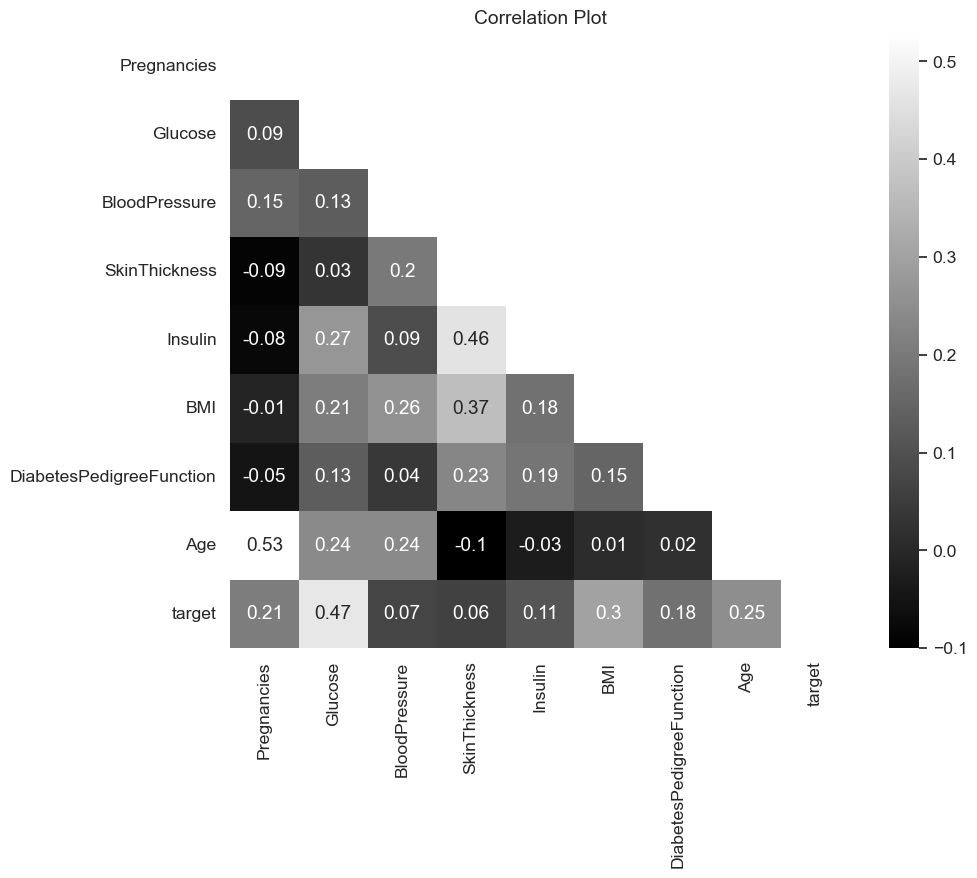

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(10, 8))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

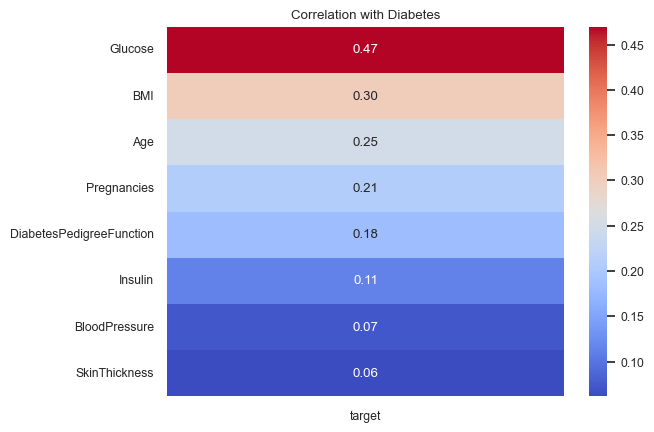

In [83]:
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['target'].drop('target')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [139]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
print("Selected features:", selected_features)

Selected features: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'target'],
      dtype='object')


In [140]:
import pandas as pd

df = X[selected_features].copy()
print("Dataset with Selected Features:")
df

Dataset with Selected Features:


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,0,33.600000,0.627000,50,1
1,1,85,0,26.600000,0.351000,31,0
2,8,183,0,23.300000,0.672000,32,1
3,1,89,94,28.100000,0.167000,21,0
4,0,137,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...
995,2,167,0,38.715276,1.043762,24,1
996,1,97,159,37.581293,0.676599,24,1
997,9,144,130,37.882615,0.631878,40,1
998,7,144,0,34.034233,0.133002,41,1


In [141]:
x=df.drop(columns='target',axis=1)
y=df['target']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [143]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [144]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression')
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       105
           1       0.75      0.77      0.76        95

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200

Confusion matrix:
 [[81 24]
 [22 73]]


In [150]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_test, y_test, cv=10)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.75 0.85 0.7  0.8  0.85 0.8  0.8  0.7  0.8  0.75]
Mean CV Accuracy: 0.78


<Axes: >

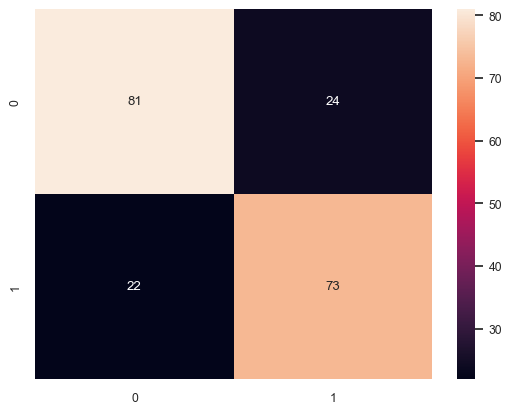

In [151]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')

Random Forest Classifier

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [153]:
print('Random Forest')
print("Accuracy:", accuracy_score(y_pred,y_test))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest
Accuracy: 0.815
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       105
           1       0.76      0.89      0.82        95

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.83      0.81      0.81       200

Confusion matrix:
 [[78 27]
 [10 85]]


In [155]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_test, y_test, cv=10)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.9  0.9  0.85 0.9  0.8  0.85 0.75 0.8  0.85 0.85]
Mean CV Accuracy: 0.845


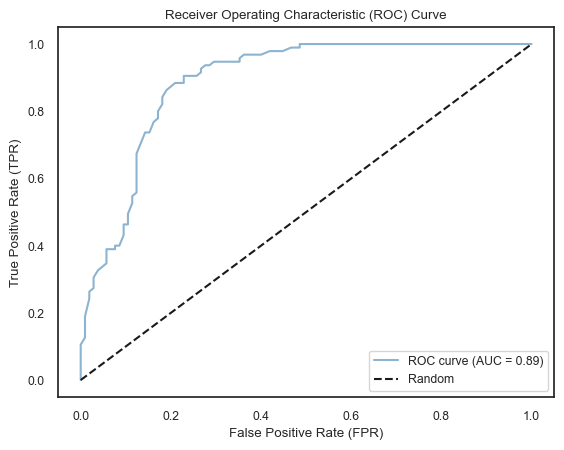

In [96]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: >

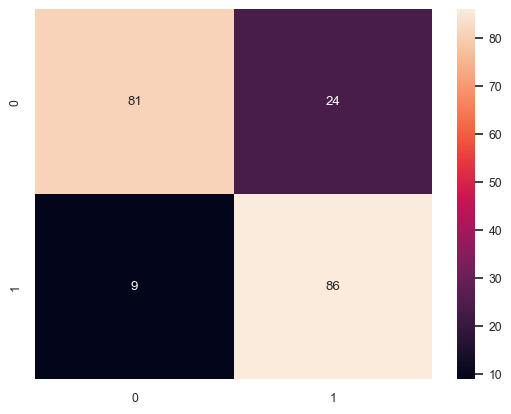

In [97]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')